In [ ]:
#entropy package
from scipy.stats import entropy

p = [2/8, 6/8]
ent = entropy(p, base=2)
print("Entropy = ", ent)

Entropy =  0.8112781244591328


In [ ]:
!wget https://gist.github.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/archive/4a8e3da267a0c1f0d650901d8295a5153bde8b21.zip

In [ ]:
!unzip 4a8e3da267a0c1f0d650901d8295a5153bde8b21.zip

Archive:  4a8e3da267a0c1f0d650901d8295a5153bde8b21.zip
4a8e3da267a0c1f0d650901d8295a5153bde8b21
   creating: c6590d0cf119e87c39e31c21a9c0f3a8-4a8e3da267a0c1f0d650901d8295a5153bde8b21/
  inflating: c6590d0cf119e87c39e31c21a9c0f3a8-4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv  


In [ ]:
!mv c6590d0cf119e87c39e31c21a9c0f3a8-4a8e3da267a0c1f0d650901d8295a5153bde8b21 tennis_folder

In [ ]:
import pandas as pd
df = pd.read_csv('tennis_folder/PlayTennis.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
string_to_int = LabelEncoder()                     #encode your data
df = df.apply(string_to_int.fit_transform) #fit and transform it

In [ ]:
#To divide our data into attribute set and Label:
feature_cols = ['Outlook','Temperature','Humidity','Wind']
X = df[feature_cols]
y = df['Play Tennis']

In [ ]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)     # create a classifier object
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


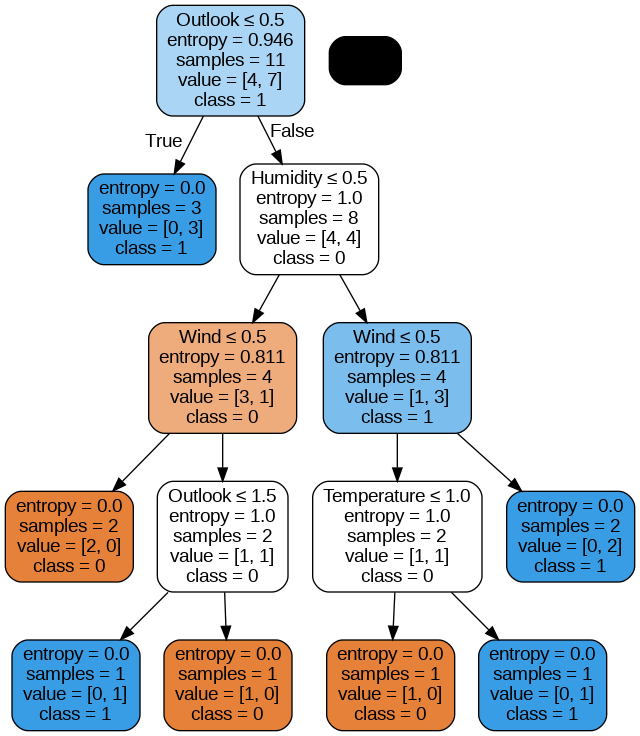

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True,
                rounded=True, special_characters=True,
                feature_names =feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())

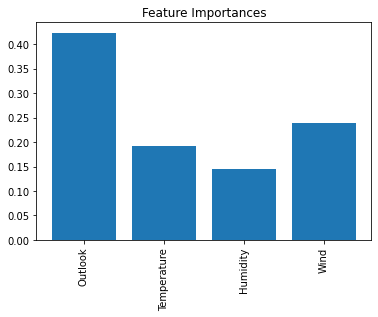

In [ ]:
# Plot feature importances
import matplotlib.pyplot as plt

plt.bar(range(len(classifier.feature_importances_)), classifier.feature_importances_)
plt.xticks(range(len(classifier.feature_importances_)), feature_cols, rotation=90)
plt.title('Feature Importances')
plt.show()